# Thực hiện trực quan hóa dữ liệu trên tập dữ liệu về phân loại chất lượng rượu đỏ

## 1. Giới thiệu chung

Bộ dữ liệu **Red Wine Quality** được lấy từ nghiên cứu của **Cortez et al. (2009)**, thuộc Đại học Minho (Bồ Đào Nha).  
Dữ liệu mô tả các **đặc tính hóa học** của rượu vang đỏ vùng **Vinho Verde**, và chất lượng cảm quan của chúng (được đánh giá bởi chuyên gia nếm rượu).

## 2. Mục tiêu
- Khám phá mối tương quan giữa các chỉ số hóa học và điểm chất lượng rượu.
- Trực quan hóa dữ liệu thông qua biểu đồ phân bố, heatmap, boxplot, và pairplot.

## 3. Thông tin về dữ liệu

- **1599 mẫu** rượu vang đỏ  
- **12 biến (features)**: 11 biến độc lập (đặc tính hóa lý) + 1 biến phụ thuộc (quality)

| Biến | Mô tả | Đơn vị | 
|------|--------|---------|
| fixed acidity | Lượng axit cố định (tartaric acid) | g/dm³ | 
| volatile acidity | Lượng axit bay hơi (acetic acid) | g/dm³ | 
| citric acid | Lượng axit citric | g/dm³ | 
| residual sugar | Đường dư sau khi lên men | g/dm³ | 
| chlorides | Lượng muối (clorua) | g/dm³ | 
| free sulfur dioxide | SO₂ ở dạng tự do | mg/dm³ | 
| total sulfur dioxide | Tổng lượng SO₂ | mg/dm³ | 
| density | Mật độ chất lỏng | g/cm³ | 
| pH | Độ pH | - |
| sulphates | Lượng sunphat (kali sunphat) | g/dm³ | 
| alcohol | Nồng độ cồn | % (v/v) |
| quality | Điểm đánh giá chất lượng (0–10) | - |


## 4. Nạp và xem trước dữ liệu

### Import thư viện

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Đọc dữ liệu 

In [3]:
data = pd.read_csv("winequality-red.csv")
data.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
print("Kiểm tra dữ liệu và giá trị thiếu: ")
data.info()

Kiểm tra dữ liệu và giá trị thiếu: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Nhận xét:** 
Kết quả cho thấy:
- Dữ liệu gồm 12 cột (11 đặc tính + 1 biến mục tiêu `quality`).
- Không có giá trị thiếu (NaN).
- Tất cả biến đều là dạng số (numeric).

## 5. Trực quan hóa dữ liệu

### Histogram: Phân bố điểm chất lượng rượu

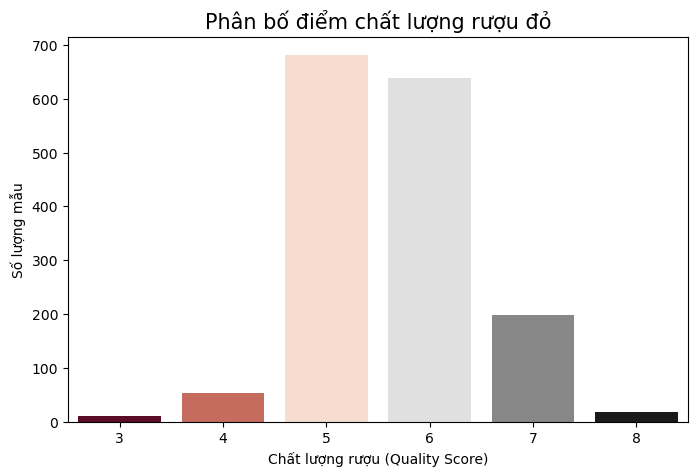

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', hue='quality', data=data, palette='RdGy', legend=False)
plt.title('Phân bố điểm chất lượng rượu đỏ', fontsize=15)
plt.xlabel('Chất lượng rượu (Quality Score)')
plt.ylabel('Số lượng mẫu')
plt.show()

**Nhận xét:**
- Dữ liệu chủ yếu tập trung ở các mức 5–6, tức là rượu chất lượng trung bình.
- Rất ít mẫu ở mức 3–4 (rượu kém) và 7–8 (rượu ngon).

### Phân bố một số đặc trưng hóa học

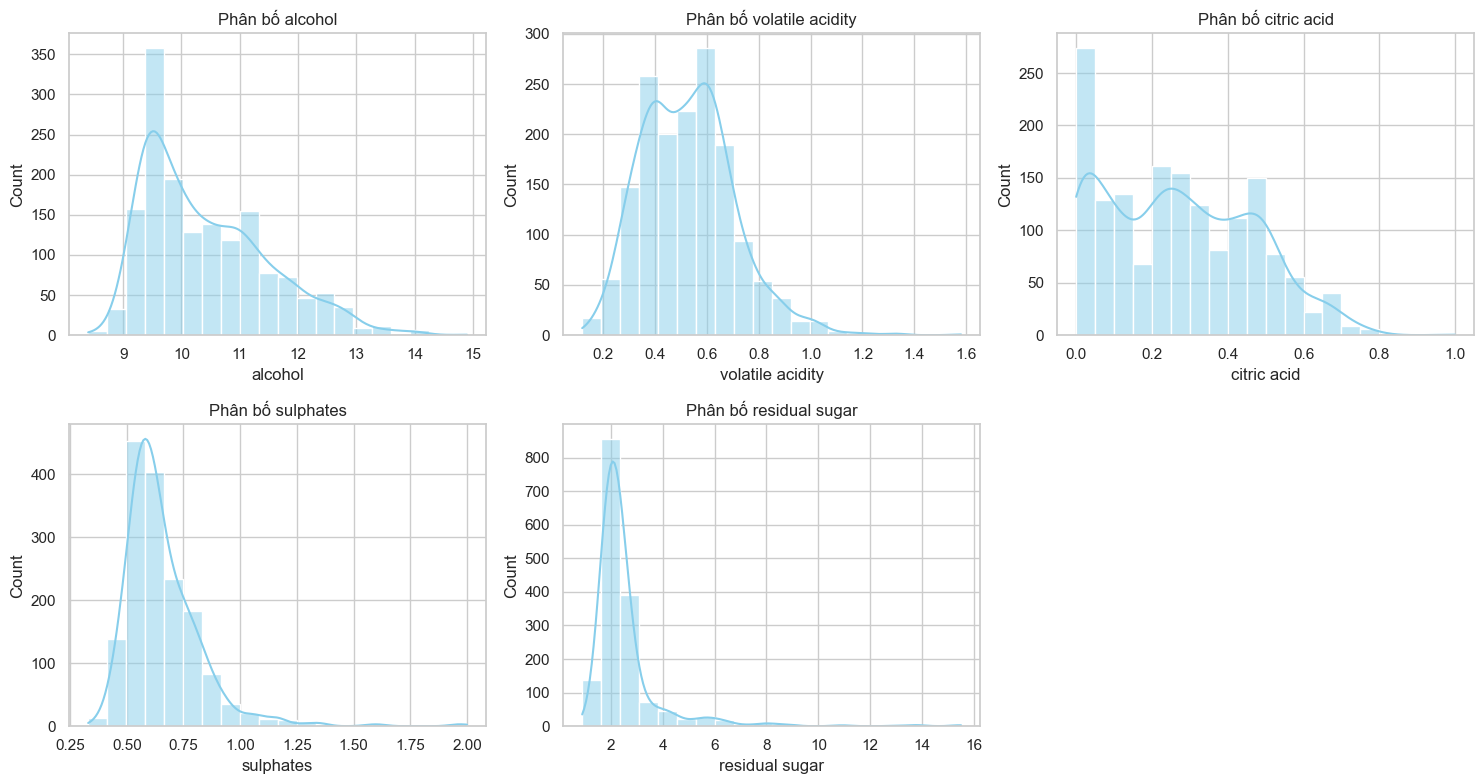

In [19]:
features = ['alcohol', 'volatile acidity', 'citric acid', 'sulphates', 'residual sugar']

plt.figure(figsize=(15,8))
for i, col in enumerate(features):
    plt.subplot(2,3,i+1)
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f'Phân bố {col}', fontsize=12)
plt.tight_layout()
plt.show()

**Nhận xét:**
- Các đặc trưng hóa học trong rượu đỏ có phân bố lệch phải, cho thấy hầu hết mẫu có giá trị trung bình thấp và chỉ một số ít mẫu có giá trị cao.
- Đặc biệt, rượu có độ cồn và sulphates cao thường hiếm hơn nhưng có thể liên quan đến chất lượng rượu tốt hơn.

### Ma trận tương quan giữa các biến hóa học và chất lượng

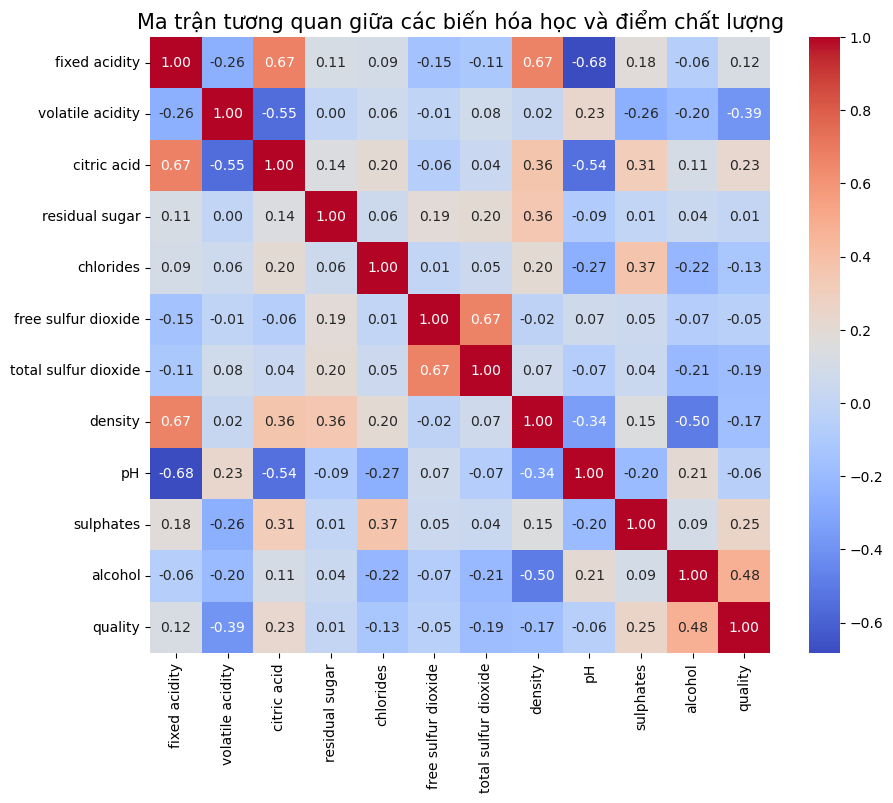

In [8]:
plt.figure(figsize=(10,8))
corr = data.corr(numeric_only=True)
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Ma trận tương quan giữa các biến hóa học và điểm chất lượng', fontsize=15)
plt.show()


**Nhận xét:**
- alcohol có tương quan dương mạnh nhất với quality → rượu có độ cồn cao thường được đánh giá cao hơn.
- volatile acidity có tương quan âm mạnh nhất → độ chua bay hơi cao làm giảm chất lượng.
- Các biến khác (như citric acid, sulphates) có tương quan mức trung bình.

### Boxplot: So sánh alcohol và volatile acidity theo chất lượng

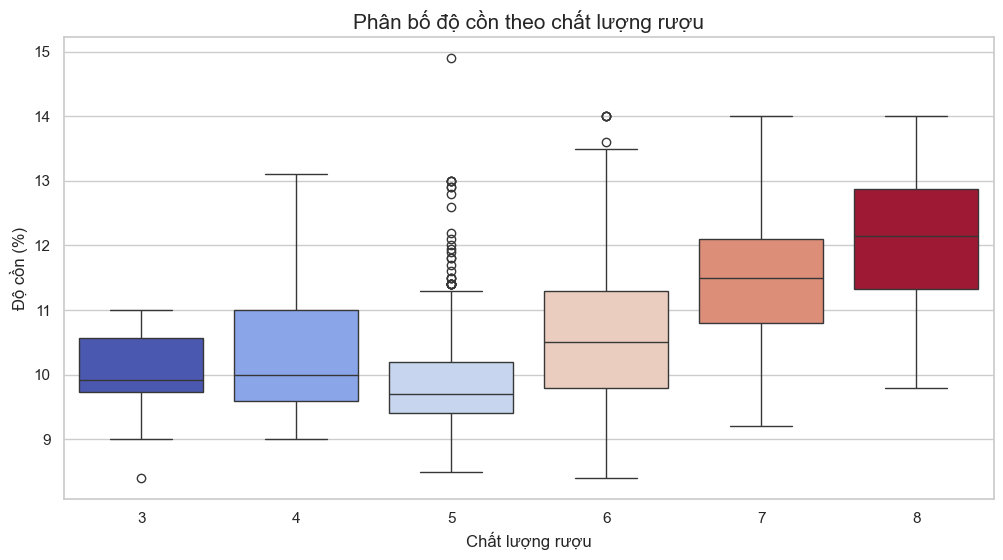

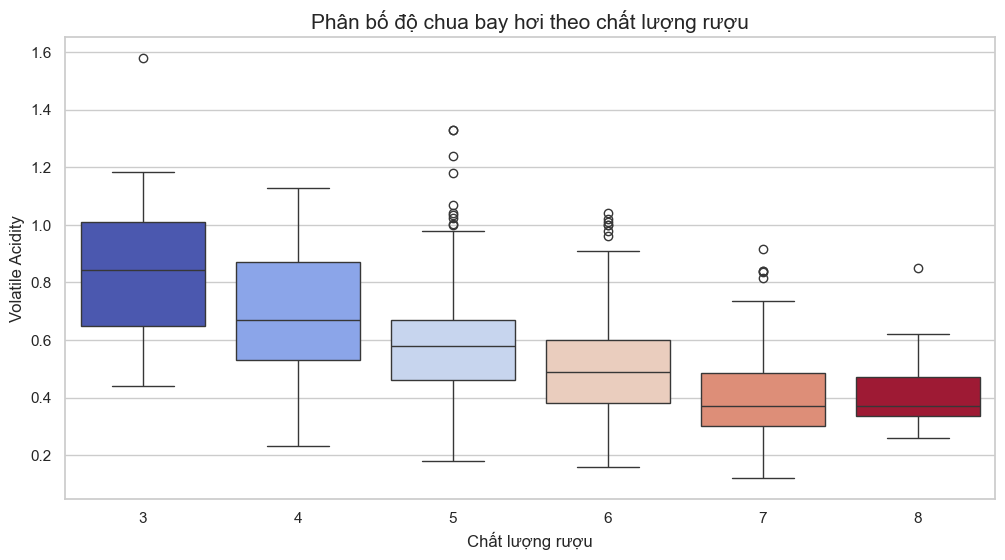

In [20]:
plt.figure(figsize=(12,6))
sns.boxplot(x='quality', y='alcohol', hue='quality', data=data, palette='coolwarm', legend=False)
plt.title('Phân bố độ cồn theo chất lượng rượu', fontsize=15)
plt.xlabel('Chất lượng rượu')
plt.ylabel('Độ cồn (%)')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='quality', y='volatile acidity', hue='quality', data=data, palette='coolwarm', legend=False)
plt.title('Phân bố độ chua bay hơi theo chất lượng rượu', fontsize=15)
plt.xlabel('Chất lượng rượu')
plt.ylabel('Volatile Acidity')
plt.show()

**Nhận xét:**
- Rượu có điểm cao (7–8) thường có alcohol cao hơn, volatile acidity thấp hơn.
- Đây là hai đặc trưng quan trọng để phân loại chất lượng rượu.

### Scatter plot: Mối quan hệ giữa độ cồn và độ axit bay hơi

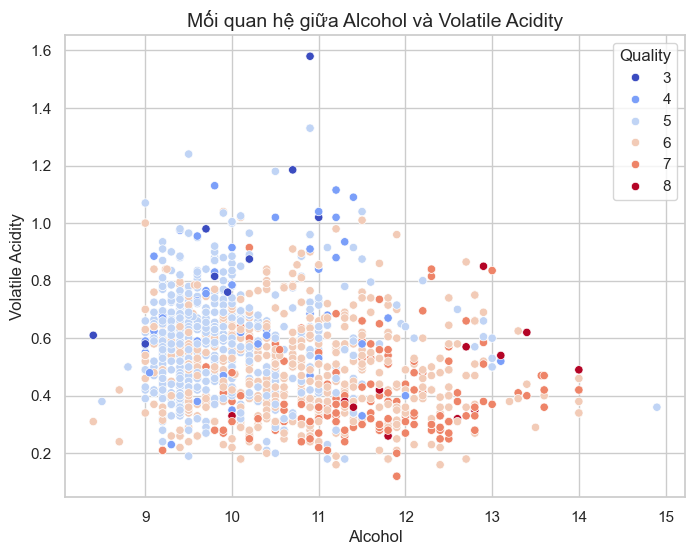

In [21]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='volatile acidity', hue='quality', data=data, palette='coolwarm')
plt.title('Mối quan hệ giữa Alcohol và Volatile Acidity', fontsize=14)
plt.xlabel('Alcohol')
plt.ylabel('Volatile Acidity')
plt.legend(title='Quality')
plt.show()

**Nhận xét:**
- Quan sát cho thấy rượu có độ cồn cao (Alcohol lớn) và độ axit bay hơi thấp (Volatile Acidity nhỏ) thường thuộc nhóm chất lượng cao hơn (màu đỏ).
- Ngược lại, các mẫu rượu có độ cồn thấp và axit bay hơi cao thường nằm trong nhóm chất lượng thấp (màu xanh).
- Điều này gợi ý rằng Alcohol và Volatile Acidity là hai yếu tố ảnh hưởng mạnh đến chất lượng rượu đỏ.

### Pairplot: Mối quan hệ tổng quát

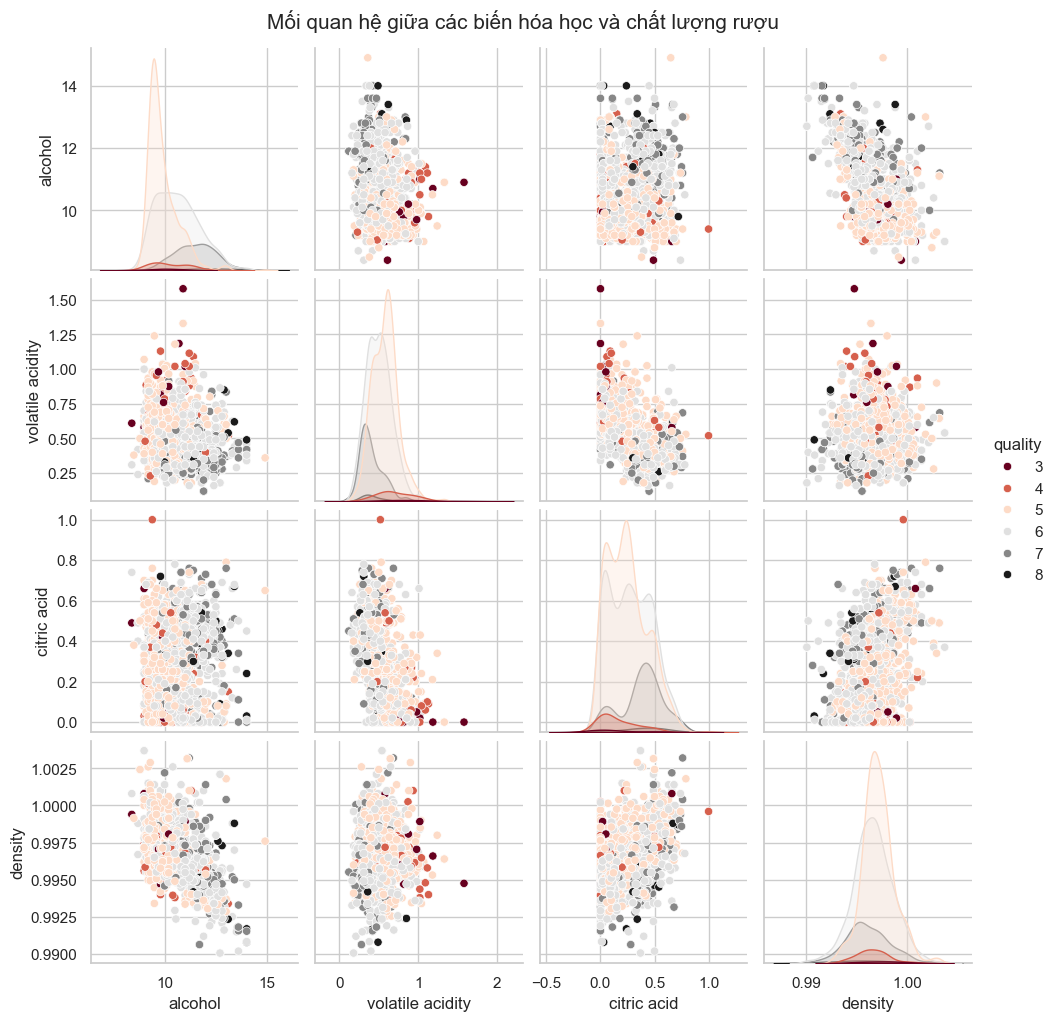

In [18]:
sns.pairplot(data[['alcohol', 'volatile acidity', 'citric acid', 'density', 'quality']],
             hue='quality', palette='RdGy', diag_kind='kde', height=2.5)
plt.suptitle('Mối quan hệ giữa các biến hóa học và chất lượng rượu', y=1.02, fontsize=15)
plt.show()

**Nhận xét:**
- Độ cồn (alcohol) có xu hướng tăng theo chất lượng rượu — rượu có chất lượng cao thường có nồng độ cồn lớn hơn.
- Volatile acidity (độ axit bay hơi) có tương quan nghịch với chất lượng — rượu càng nhiều axit bay hơi thì chất lượng càng thấp.
- Citric acid và density (mật độ) có xu hướng thay đổi nhẹ theo chất lượng, nhưng mối liên hệ không mạnh.